In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from mlresearch.utils import set_matplotlib_style
from recgame.environments import BaseEnvironment
from recgame.recourse import NFeatureRecourse
from recgame.utils import generate_synthetic_data

set_matplotlib_style(16)

# Some variables to define the problem
RNG_SEED = 42
N_CONTINUOUS = 2
N_CAT = 0
N_AGENTS = 100

# Environment variables
N_LOANS = 10  # np.array([20, 1, 10, 30, 0, 5, 50, 10, 40])
ADAPTATION = .3  # np.array([.2, .1, .3, .25, .1, .4, .05, .05, .2])
NEW_AGENTS = 10  # np.array([40, 10, 50, 5, 0, 100, 0, 0, 20])

df, y, categorical = generate_synthetic_data(N_AGENTS, N_CONTINUOUS, N_CAT, RNG_SEED)

lr = LogisticRegression().fit(df, y)

In [2]:
def data_source_func(n_agents):
    X, _, _ = generate_synthetic_data(
        n_agents=n_agents,
        n_continuous=N_CONTINUOUS,
        n_categorical=N_CAT,
    )
    return X

In [3]:
# Define the necessary components to run simulation
recourse = NFeatureRecourse(lr, n_features=2, categorical=categorical)
environment = BaseEnvironment(
    X=df,
    recourse=recourse,
    data_source_func=data_source_func,
    threshold=N_LOANS,
    threshold_type="absolute",
    adaptation=ADAPTATION,
    behavior_function="binary_constant",
    growth_rate=NEW_AGENTS,
    growth_rate_type="absolute",
    random_state=RNG_SEED,
)

environment.simulate(20)

BaseEnvironment(X=         f_0       f_1
0   0.601572  0.153339
1   0.750150  0.813522
2  -0.150345  0.065940
3   0.542613  0.394586
4   0.494400  0.215652
..       ...       ...
95  1.074555  0.440160
96  0.372271  0.987148
97  0.130985  0.201758
98  0.714442  0.368465
99  0.498293  0.445519

[100 rows x 2 columns],
                adaptation=0.3, behavior_function='binary_constant',
                data_source_func=<function data_source_func at 0x7fb3b045c160>,
                growth_rate=10, growth_rate_type='absolute', random_state=42,
                recourse=NFeatureRecourse(categorical=[],
                                          model=LogisticRegression(),
                                          n_features=2,
                                          threshold=0.6057224163373562),
                threshold=10)

<Axes: title={'center': 'Population scores over 21 time steps'}, xlabel='Step', ylabel='Score'>

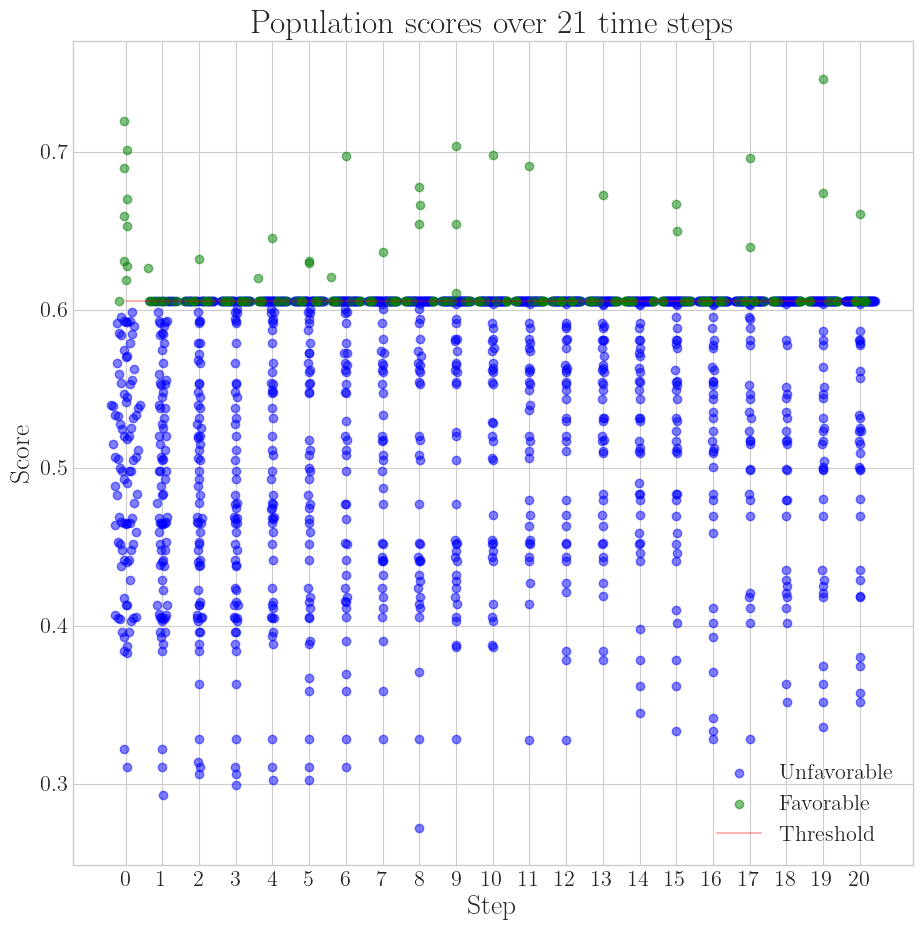

In [4]:
environment.plot.agent_scores()

<Axes: title={'center': 'Population at t=1'}, xlabel='f_0', ylabel='f_1'>

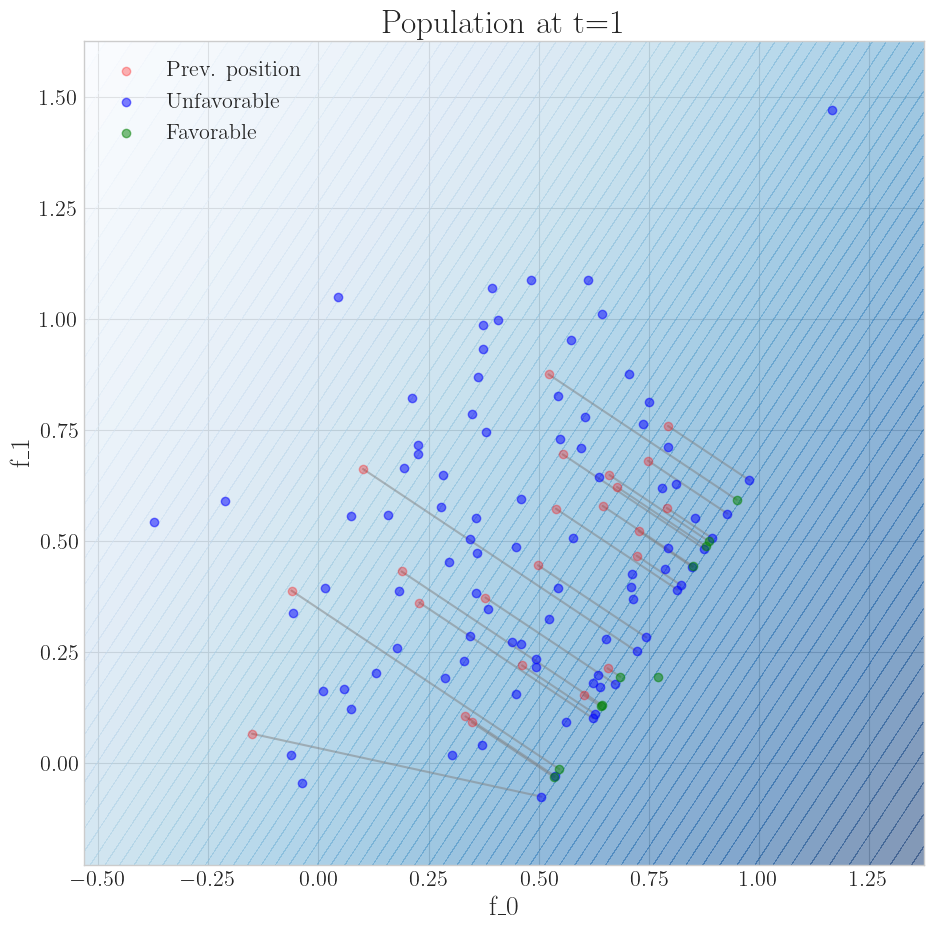

In [5]:
environment.plot.scatter(1)

(array([ 2.,  3., 13., 18., 16., 20., 17.,  5.,  3.,  3.]),
 array([0.31059223, 0.35146955, 0.39234686, 0.43322417, 0.47410149,
        0.5149788 , 0.55585612, 0.59673343, 0.63761074, 0.67848806,
        0.71936537]),
 <BarContainer object of 10 artists>)

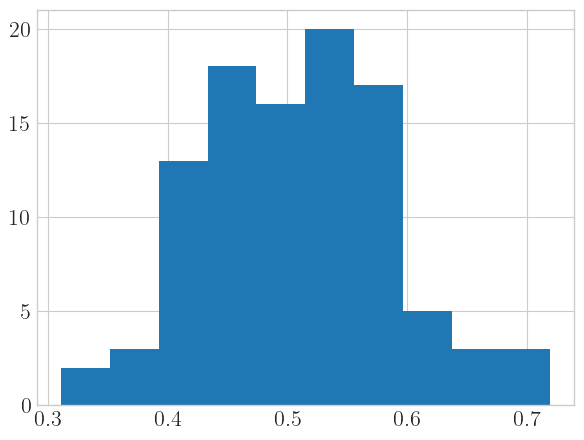

In [6]:
environment.plot.scores_histogram(0)

<Axes: ylabel='Density'>

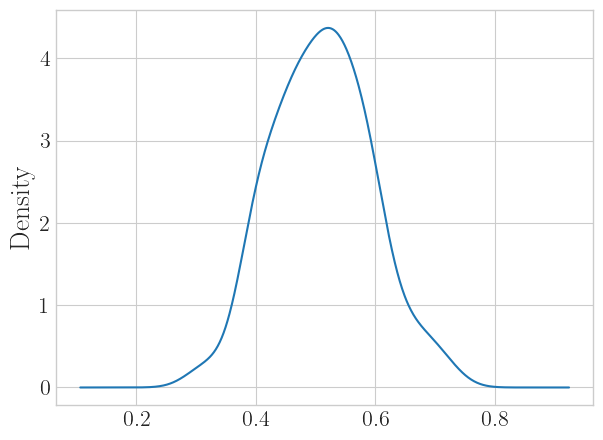

In [7]:
environment.plot.scores_kde(0)
# environment.plot.scores_kde(100)

<Axes: title={'center': 'Population size over 21 time steps'}, xlabel='Step', ylabel='Number of agents'>

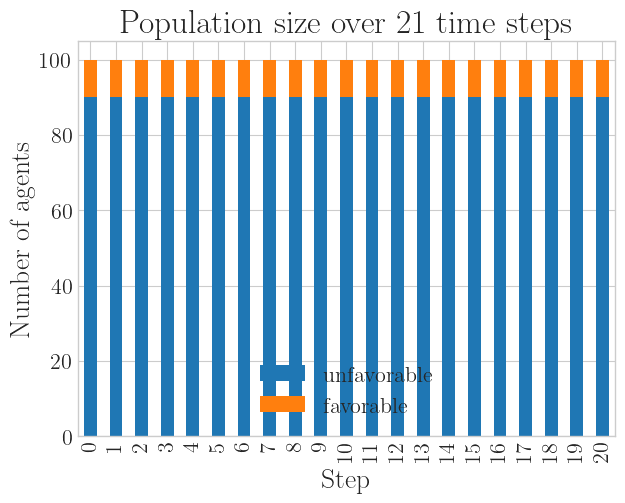

In [8]:
environment.plot.population_size()

In [9]:
environment.analysis.success_rate(1, 20)

array([0.42857143, 0.33333333, 0.26666667, 0.42857143, 0.        ,
       0.16666667, 0.07692308, 0.11111111, 0.25      , 0.27272727,
       0.14285714, 0.14285714, 0.        , 0.375     , 0.27272727,
       0.2       , 0.14285714, 0.28571429, 0.09090909])

In [10]:
environment.analysis.threshold_drift(1, 20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [11]:
environment.analysis.agents_info()

,entered_step,n_adaptations,favorable_step,original_score,final_score,n_failures
0,0,1,1.0,0.592102,0.605722,0
1,0,2,4.0,0.519861,0.605722,0
2,0,1,5.0,0.417626,0.605722,1
3,0,1,12.0,0.537543,0.605722,1
4,0,1,16.0,0.555235,0.605722,1
...,...,...,...,...,...,...
295,20,0,NaN,0.560988,NaN,0
296,20,0,NaN,0.418759,NaN,0
297,20,0,NaN,0.580734,NaN,0
298,20,0,NaN,0.579066,NaN,0


In [12]:
environment.metadata_[0]["threshold"]

0.6057224163373562

In [13]:
# probability of an agent to be above the threshold
p = environment.analysis.new_agent_proba(environment.metadata_[10]["threshold"])

# number of observations to generate to have 10 observations above threshold
n = 100 / p
n

1000.0

In [14]:
environment.behavior_function

'binary_constant'

In [15]:
environment.analysis.steps_info()

,n_adapted,n_candidates,favorable_outcomes,success_rate,threshold,threshold_drift,new_agents,new_agents_proba,moving_agent_proba,success_proba
1,23.0,21.0,10.0,0.428571,0.605722,0.0,10.0,0.1,0.307692,0.000176
2,24.0,18.0,10.0,0.333333,0.605722,0.0,10.0,0.1,0.289855,0.002370
3,20.0,15.0,10.0,0.266667,0.605722,0.0,10.0,0.1,0.296875,0.003923
4,19.0,14.0,10.0,0.428571,0.605722,0.0,10.0,0.1,0.275862,0.022764
5,16.0,9.0,10.0,0.000000,0.605722,0.0,10.0,0.1,0.263158,0.038164
6,15.0,12.0,10.0,0.166667,0.605722,0.0,10.0,0.1,0.339623,0.004796
7,18.0,13.0,10.0,0.076923,0.605722,0.0,10.0,0.1,0.204082,0.341965
8,10.0,9.0,10.0,0.111111,0.605722,0.0,10.0,0.1,0.276596,0.087846
9,13.0,8.0,10.0,0.250000,0.605722,0.0,10.0,0.1,0.347826,0.013293
10,16.0,11.0,10.0,0.272727,0.605722,0.0,10.0,0.1,0.409091,0.002427


,success_proba,threshold_drift
success_proba,1.0,NaN
threshold_drift,NaN,NaN


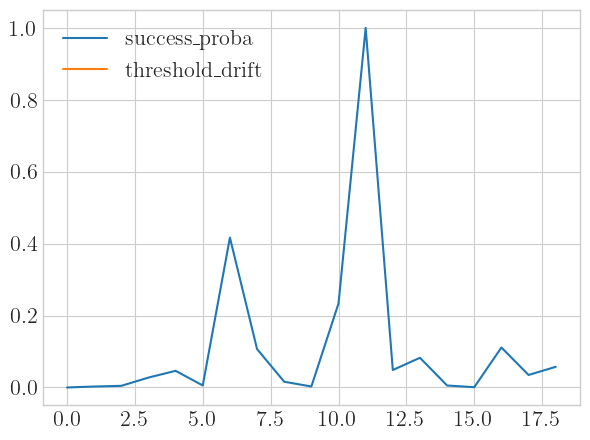

In [16]:
steps_info = environment.analysis.steps_info()
predictions = pd.concat(
    [
        steps_info.success_proba.iloc[:-1].reset_index(drop=True),
        steps_info.threshold_drift.iloc[1:].reset_index(drop=True) * -1,
    ],
    axis=1,
).astype(float)
((predictions - predictions.min()) / (predictions.max() - predictions.min())).iloc[
    :50
].plot.line()
predictions.corr()

<Axes: >

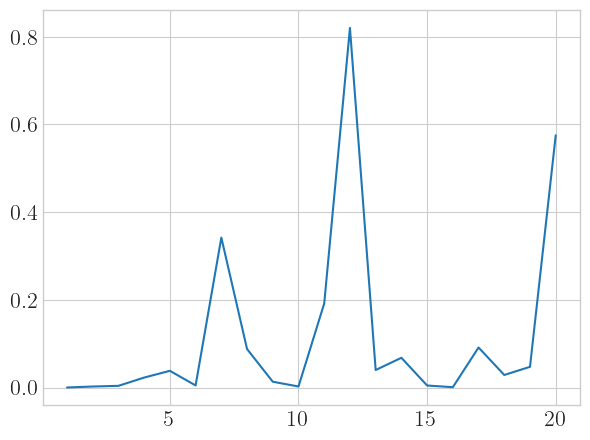

In [17]:
steps_info.success_proba.plot.line()

<Axes: >

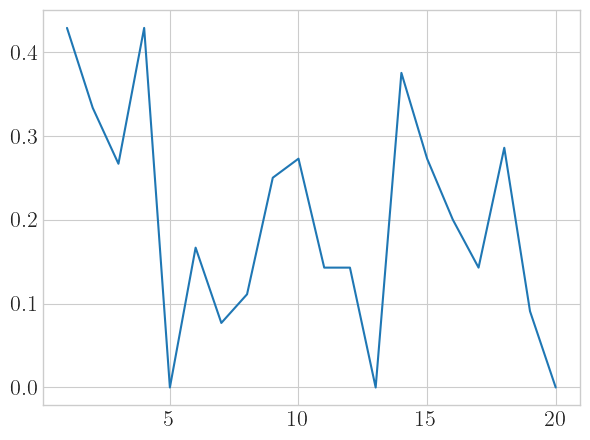

In [18]:
environment.analysis.steps_info().success_rate.plot.line()